In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from windrose import WindroseAxes
import os


#### About dataset
In Wind Turbines, Scada Systems measure and save data's like wind speed, wind direction, generated power etc. for 10 minutes intervals. This file was taken from a wind turbine's scada system that is working and generating power in Turkey.

In [2]:
data_wd = pd.read_csv("T1.csv")

#### Content
- Date/Time (for 10 minutes intervals)
- LV ActivePower (kW): The power generated by the turbine for that moment
- Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)
- Theoretical_Power_Curve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer
- Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

In [3]:
data_wd.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
# data overview
data_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [5]:
data=data_wd.copy()

In [6]:
# Renaming column name
data.rename(columns={'Date/Time':'Time','LV ActivePower (kW)':'ActivePower(kW)',"Wind Speed (m/s)":"WindSpeed(m/s)","Wind Direction (°)":"Wind_Direction"},
             inplace=True)
data.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [7]:
# converting time into datatime 
data["Time"] = pd.to_datetime(data["Time"], format = "%d %m %Y %H:%M")

In [8]:
# adding new column month
data["Month"] = data["Time"].dt.month_name()

In [9]:
#function for rewriting wind speed for 0.5 intervals
def wind_speed_intervel(x):
    intervel = .5
    nearest = round(x/intervel)*intervel
    return nearest

In [10]:
#adding a new column as "Rounded_WindSpeed" with function wind_speed_intervel().
data["Rounded_WindSpeed"] = data["WindSpeed(m/s)"].apply(wind_speed_intervel)
data.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,Rounded_WindSpeed
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,January,5.5
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,January,5.5
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,January,5.0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,January,5.5
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,January,5.5


In [11]:
#function for rewriting wind direction for 30 intervals. 
def Direction (x):
    intervel = 30
    Wind_Direction_rounded = round(x/intervel)*intervel
    if Wind_Direction_rounded == 360:
        return 0
    else :
        return Wind_Direction_rounded

In [12]:
#adding a new column as "Wind_Direction_rounded" with function Wind_Direction_rounded().
data["Wind_Direction_rounded"] = data["Wind_Direction"].apply(Direction)
data.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,Rounded_WindSpeed,Wind_Direction_rounded
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,January,5.5,270
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,January,5.5,270
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,January,5.0,270
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,January,5.5,270
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,January,5.5,270


In [13]:
#function for rewriting wind direction with letters.
def find_direction(x):
    if x==0:
        return "N"
    if x==30:
        return "NNE"
    if x==60:
        return "NEE" 
    if x==90:
        return "E" 
    if x==120:
        return "SEE" 
    if x==150:
        return "SSE" 
    if x==180:
        return "S" 
    if x==210:
        return "SSW" 
    if x==240:
        return "SWW" 
    if x==270:
        return "W" 
    if x==300:
        return "NWW" 
    if x==330:
        return "NNW"


#### Name corresponding to the wind direction
- 0 degrees corresponds to "N" (north)
- 30 degrees corresponds to "NNE" (north-northeast)
- 60 degrees corresponds to "NEE" (northeast-east)
- 90 degrees corresponds to "E" (east)
- 120 degrees corresponds to "SEE" (south-southeast)
- 150 degrees corresponds to "SSE" (south-southeast)
- 180 degrees corresponds to "S" (south)
- 210 degrees corresponds to "SSW" (south-southwest)
- 240 degrees corresponds to "SWW" (southwest-west)
- 270 degrees corresponds to "W" (west)
- 300 degrees corresponds to "NWW" (northwest-west)
- 330 degrees corresponds to "NNW" (north-northwest)

In [14]:
#adding a new column as "Direction" with function find_direction().
data["Direction"]=data["Wind_Direction_rounded"].apply(find_direction)
data

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,Rounded_WindSpeed,Wind_Direction_rounded,Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,January,5.5,270,W
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,January,5.5,270,W
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,January,5.0,270,W
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,January,5.5,270,W
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,January,5.5,270,W
...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,December,11.5,90,E
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,December,7.5,90,E
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,December,8.5,90,E
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,December,9.5,90,E


In [15]:
#Number of wind speed values between 3.5 and 25. 
len(data["WindSpeed(m/s)"][(data["WindSpeed(m/s)"]>3.5) & (data["WindSpeed(m/s)"]<=25)])

40634

In [16]:
#Values bigger than 25. 
data["WindSpeed(m/s)"][data["WindSpeed(m/s)"]>25].value_counts()

25.206011    1
Name: WindSpeed(m/s), dtype: int64

In [17]:
#Values bigger than 3.5. 
len(data["WindSpeed(m/s)"][data["WindSpeed(m/s)"]<3.5])

9895

In [18]:
#Remove the data that wind speed is smaller than 3.5 and bigger than 25.5
#We do that because according to turbine power curve turbine works between these values.
data_filtered =data[(data["WindSpeed(m/s)"]>3.5) & (data["WindSpeed(m/s)"]<=25.5)]
data_filtered.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,Rounded_WindSpeed,Wind_Direction_rounded,Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,January,5.5,270,W
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,January,5.5,270,W
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,January,5.0,270,W
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,January,5.5,270,W
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,January,5.5,270,W


This code removes wind speed data points that are less than 3.5 or greater than 25.5 m/s. This range is significant because it is within the operating range of most modern wind turbines, where the turbine is able to generate useful power output but is not at risk of damage or failure.

In [19]:
data_filtered

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,Rounded_WindSpeed,Wind_Direction_rounded,Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,January,5.5,270,W
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,January,5.5,270,W
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,January,5.0,270,W
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,January,5.5,270,W
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,January,5.5,270,W
...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,December,11.5,90,E
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,December,7.5,90,E
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,December,8.5,90,E
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,December,9.5,90,E


In [20]:
#Number of values where wind speed is bigger than 3.5 and active power is zero. 
#If wind speed is bigger than 3.5 and active power is zero, this means turbine is out of order. we must eliminate these.
len(data["ActivePower(kW)"][(data["ActivePower(kW)"]==0)&(data["WindSpeed(m/s)"]>3.5)])

2217

This code calculates the number of instances where the wind speed is greater than 3.5 m/s and the active power is zero. This indicates that the turbine is not working properly and needs to be eliminated from the dataset. The length of the resulting filtered data is returned.

In [21]:
#Eliminate datas where wind speed is active power is zero.
data_filtered_2 = data_filtered[(data_filtered["ActivePower(kW)"]!=0)].reset_index(drop = True)
data_filtered_2.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,Rounded_WindSpeed,Wind_Direction_rounded,Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,January,5.5,270,W
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,January,5.5,270,W
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,January,5.0,270,W
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,January,5.5,270,W
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,January,5.5,270,W


In [22]:
# finding and new column called loss by finding difference between  Theoretical power curve and Active power curve
data_clean=data_filtered_2.sort_values("Time")
data_clean["Loss_Value(kW)"]=data_clean["Theoretical_Power_Curve (KWh)"]-data_clean["ActivePower(kW)"]
data_clean["Loss(%)"]=data_clean["Loss_Value(kW)"]/data_clean["Theoretical_Power_Curve (KWh)"]*100
#round the values to 2 digit.
data_clean=data_clean.round({'ActivePower(kW)': 2, 'WindSpeed(m/s)': 2, 'Theoretical_Power_Curve (KWh)': 2,
                                   'Wind_Direction': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})

data_clean.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,Rounded_WindSpeed,Wind_Direction_rounded,Direction,Loss_Value(kW),Loss(%)
0,2018-01-01 00:00:00,380.05,5.31,416.33,259.99,January,5.5,270,W,36.28,8.71
1,2018-01-01 00:10:00,453.77,5.67,519.92,268.64,January,5.5,270,W,66.15,12.72
2,2018-01-01 00:20:00,306.38,5.22,390.90,272.56,January,5.0,270,W,84.52,21.62
3,2018-01-01 00:30:00,419.65,5.66,516.13,271.26,January,5.5,270,W,96.48,18.69
4,2018-01-01 00:40:00,380.65,5.58,491.70,265.67,January,5.5,270,W,111.05,22.59


In [23]:
#creating summary speed dataframe from clean data.
summary_speed_df =  data_clean.groupby("Rounded_WindSpeed").mean()
#removing the unnecessary columns.
summary_speed_df.drop(columns={"WindSpeed(m/s)","Wind_Direction","Wind_Direction_rounded"},inplace=True)
summary_speed_df.reset_index(inplace = True)
#rounding the values to 2 digit
summary_speed_df=summary_speed_df.round({ 'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})
#creating a count column that shows the number of wind speed from clean dat
count = data_clean["Rounded_WindSpeed"].value_counts().sort_index().reset_index()
count.rename(columns = {"index" :"Rounded_WindSpeed","Rounded_WindSpeed" : "count"},inplace = True)
summary_speed_df = summary_speed_df.merge(count, how = "left", on = "Rounded_WindSpeed")
summary_speed_df.rename(columns ={"Rounded_WindSpeed" : "WindSpeed(m/s)"} , inplace = True)
summary_speed_df

,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count
0,3.5,51.68,68.61,16.94,24.14,675
1,4.0,98.33,127.75,29.42,23.26,1736
2,4.5,183.96,222.48,38.52,17.44,1794
3,5.0,285.47,336.32,50.86,15.24,1725
4,5.5,402.30,472.10,69.80,14.84,2012
5,6.0,546.76,627.10,80.34,12.84,2216
6,6.5,713.07,807.67,94.60,11.76,2274
7,7.0,902.86,1015.80,112.94,11.16,2320
8,7.5,1122.43,1256.94,134.51,10.72,2254
9,8.0,1364.42,1529.65,165.23,10.78,2141


In [24]:
#create summary direction dataframe from clean data.
summary_direction_df = data_clean.groupby("Direction").mean()
#remove the unnecessary columns.
summary_direction_df.drop(columns={"WindSpeed(m/s)","Wind_Direction"},inplace=True)
summary_direction_df.reset_index(inplace = True)
summary_direction_df.rename(columns = {"Rounded_WindSpeed" : "WindSpeed(m/s)","Wind_Direction_rounded" :"Wind_Direction"},inplace = True)
#round the values to 2 digit
summary_direction_df=summary_direction_df.round({'WindSpeed(m/s)': 1,'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2,
                                           'Loss_Value(kW)': 2, 'Loss(%)': 2})
#sort by mean_Direction
summary_direction_df=summary_direction_df.sort_values("Wind_Direction")
summary_direction_df.drop(columns={"Wind_Direction"},inplace=True)
summary_direction_df.sort_index(inplace = True)
summary_direction_df

,Direction,ActivePower(kW),Theoretical_Power_Curve (KWh),WindSpeed(m/s),Loss_Value(kW),Loss(%)
0,E,1209.27,1345.86,7.4,136.59,3.68
1,N,1171.54,1383.10,7.4,211.56,17.91
2,NEE,1773.33,1969.08,8.8,195.75,13.02
3,NNE,1511.73,1739.18,8.4,227.45,13.76
4,NNW,873.20,992.67,6.4,119.47,19.01
5,NWW,952.25,1064.97,6.6,112.72,19.54
6,S,2409.73,2517.83,11.7,108.10,6.82
7,SEE,579.82,631.63,5.6,51.80,7.88
8,SSE,912.14,1047.23,6.7,135.09,16.16
9,SSW,2300.71,2439.50,10.9,138.79,8.12


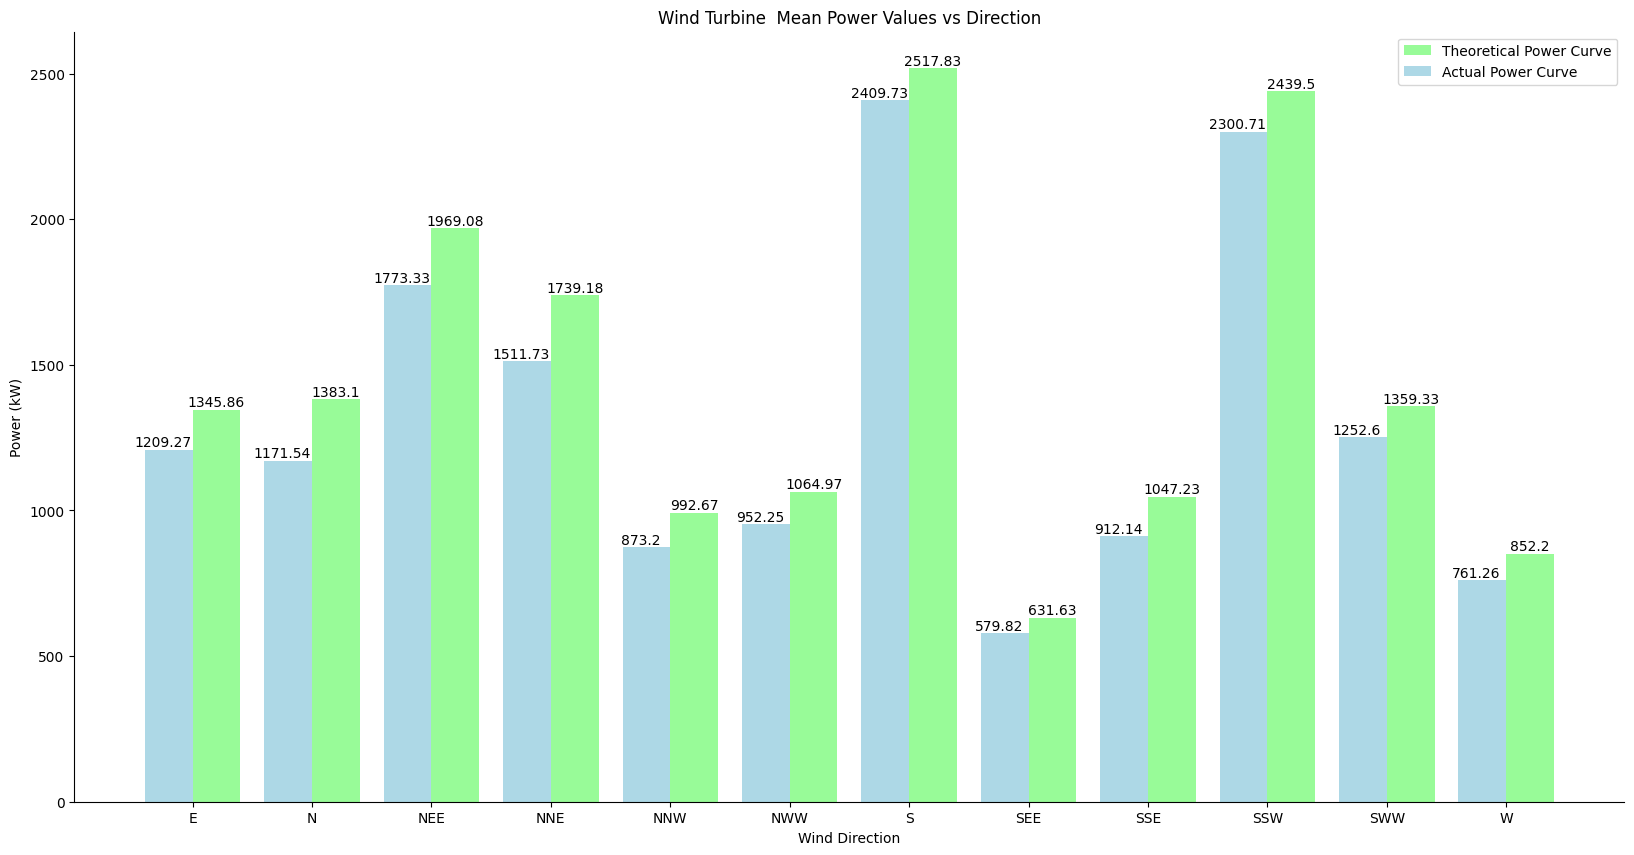

In [25]:
#Drawing graph of mean powers according to wind direction.

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
sns.despine()
ax.bar(summary_direction_df["Direction"],summary_direction_df["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",align="edge",width=0.4,color = "#98FB98")
ax.bar(summary_direction_df["Direction"],summary_direction_df["ActivePower(kW)"],label="Actual Power Curve",align="edge",width=-0.4,color = "#ADD8E6")
plt.xlabel("Wind Direction")
plt.ylabel("Power (kW)")
plt.title("Wind Turbine  Mean Power Values vs Direction")
plt.legend()
for i,v in  enumerate(summary_direction_df["Theoretical_Power_Curve (KWh)"]):
    plt.text(i+.2, v+10,str(v),ha = "center")
for i,v in  enumerate(summary_direction_df["ActivePower(kW)"]):
    plt.text(i-.25, v+10,str(v),ha = "center")
plt.show()




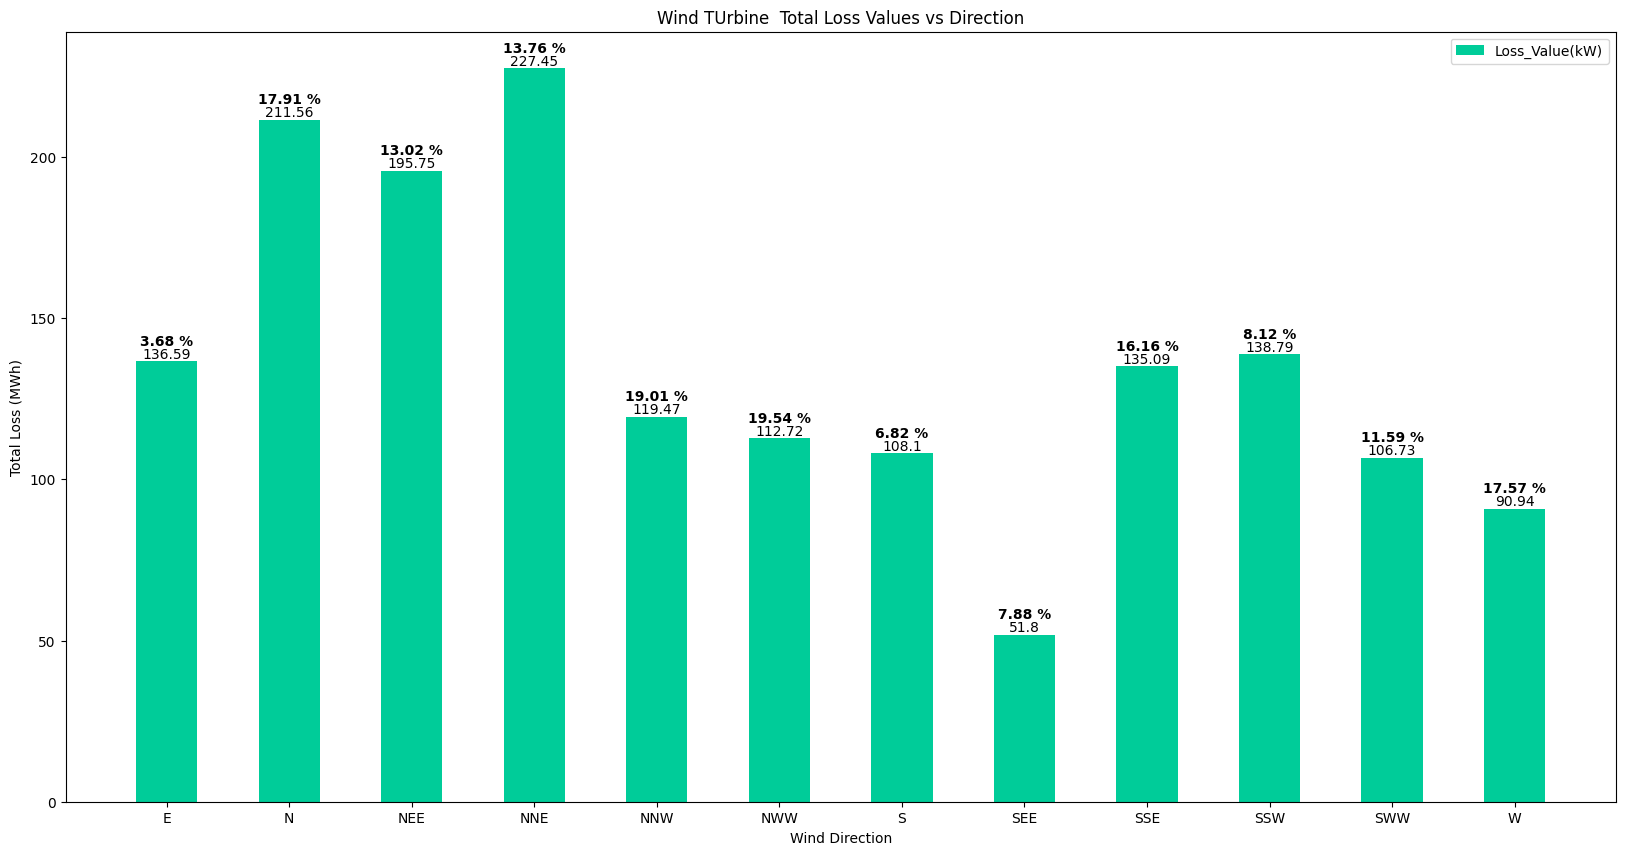

In [26]:
#Drawing graph of total loss according to wind direction.
fig = plt.figure(figsize=(20,10))
plt.bar(summary_direction_df["Direction"],summary_direction_df["Loss_Value(kW)"],
            label="Loss_Value(kW)",align="center",width=0.5, color="#00cc99",picker=5)
plt.xlabel("Wind Direction")
plt.ylabel("Total Loss (MWh)")
plt.title("Wind TUrbine  Total Loss Values vs Direction")
plt.legend()
for i,v in  enumerate(summary_direction_df["Loss_Value(kW)"]):
    plt.text(i, v+1,str(v),ha = "center")
    plt.text(i, v+5, f"{str(summary_direction_df['Loss(%)'].iloc[i])} %",ha = "center",fontweight = "bold")

plt.show()


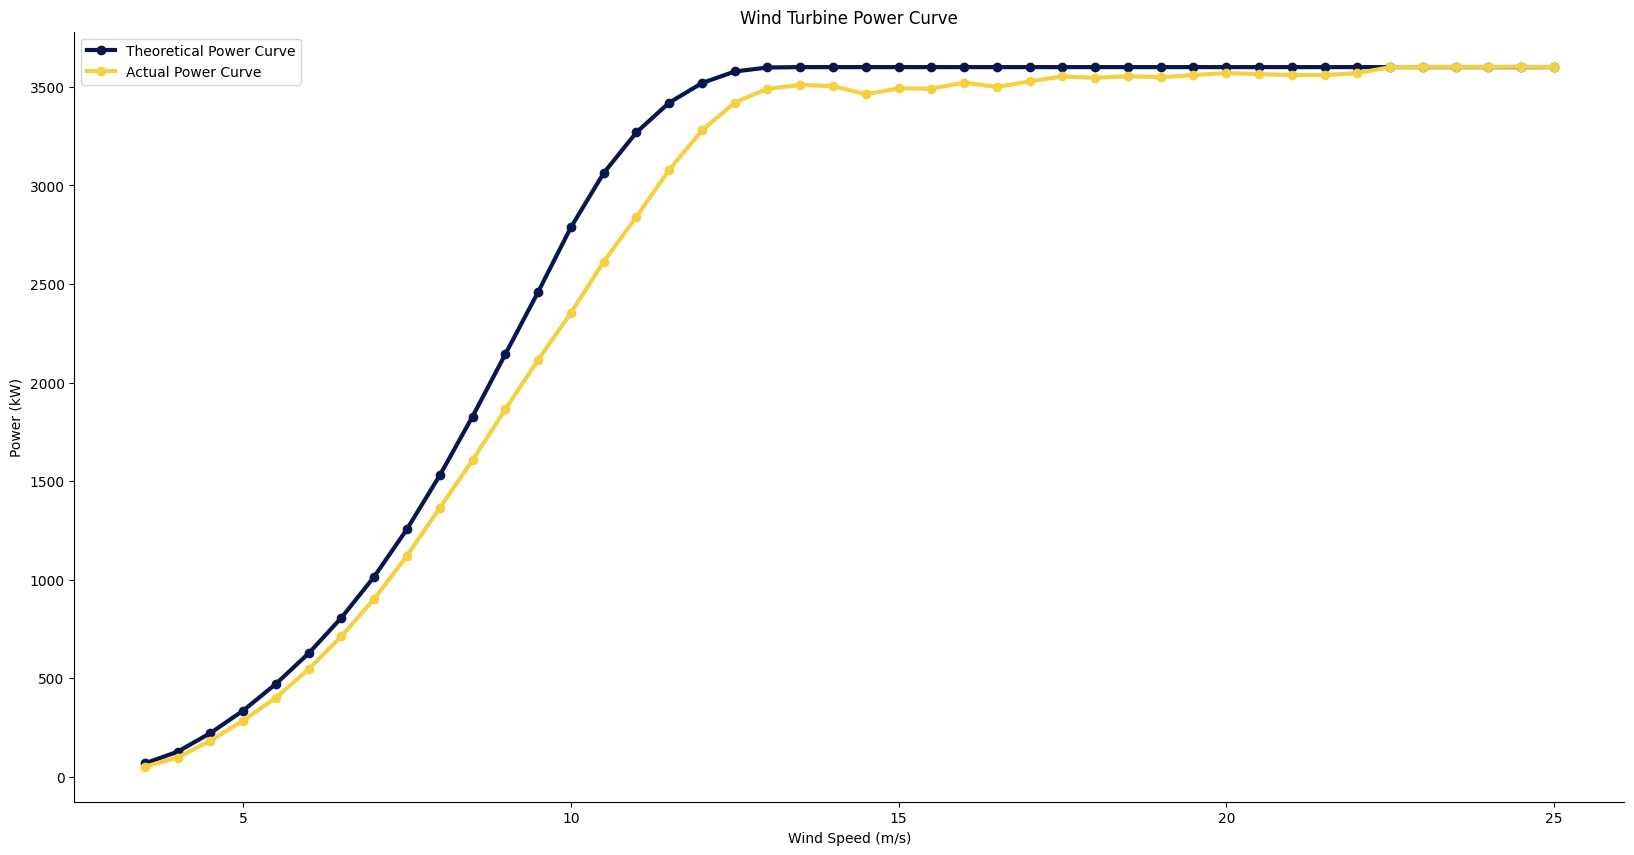

In [27]:
#Drawing power curve of the turbine, graph on variation in actual power and theoretical power
fig = plt.figure(figsize=(20,10))
plt.plot(summary_speed_df["WindSpeed(m/s)"],summary_speed_df["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",
             marker="o",markersize=6,linewidth = 3,color = "#0A174E")
plt.plot(summary_speed_df["WindSpeed(m/s)"],summary_speed_df["ActivePower(kW)"],label="Actual Power Curve",
             marker="o",markersize= 6,linewidth = 3,color = "#F5D042" )
sns.despine()
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.title("Wind Turbine Power Curve")
plt.legend()
plt.show()




In [28]:
#creating summary dataframes for all directions from clean data in a for loop as we did when creating direction dataframe.
list_data=[]
list_direction=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]
data_dict = {}
for i, direction in enumerate(list_direction):
    Data_dir = data_clean[data_clean["Direction"] == direction]
    Data_dir_i = Data_dir.groupby("Rounded_WindSpeed").mean()
    Data_dir_i.drop(columns={"WindSpeed(m/s)", "Wind_Direction", "Wind_Direction_rounded"}, inplace=True)
    Data_dir_i.reset_index(inplace=True)
    count = Data_dir["Rounded_WindSpeed"].value_counts().sort_index().reset_index()
    count.rename(columns={"index": "Rounded_WindSpeed", "Rounded_WindSpeed": "count"}, inplace=True)
    Data_dir_i = Data_dir_i.merge(count, how="left", on="Rounded_WindSpeed")
    data_dict[f"data_{direction}"] = Data_dir_i
# now you access each data frame by giving direction name
display(data_dict["data_N"],data_dict["data_SWW"])


,Rounded_WindSpeed,ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count
0,3.5,43.461379,70.577931,27.116207,38.022414,29
1,4.0,88.005743,127.568713,39.563168,31.599901,101
2,4.5,160.509216,217.006569,56.497549,26.423529,102
3,5.0,274.705960,335.668788,60.963232,18.436061,99
4,5.5,388.604286,465.838739,77.235210,16.794538,119
5,6.0,534.585161,616.484839,81.898387,13.420000,93
6,6.5,746.030256,803.166667,57.136282,7.170256,78
7,7.0,915.216806,1004.839306,89.621528,8.783611,72
8,7.5,1075.369722,1258.117500,182.747639,14.763194,72
9,8.0,1305.696338,1532.683239,226.986620,14.722817,71


,Rounded_WindSpeed,ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count
0,3.5,52.618636,71.343864,18.725682,26.704091,44
1,4.0,101.457760,134.175840,32.717760,23.714480,125
2,4.5,171.801667,216.796364,44.995000,20.968106,132
3,5.0,287.131569,342.022157,54.890980,16.349020,102
4,5.5,403.796977,472.474186,68.677209,14.722403,129
5,6.0,543.548397,620.034580,76.486947,12.438092,131
6,6.5,727.454590,810.348115,82.892869,10.263934,122
7,7.0,946.823456,1015.945221,69.122059,6.872132,136
8,7.5,1184.261111,1260.222778,75.961481,6.038333,108
9,8.0,1435.722990,1526.644845,90.922887,5.931134,97


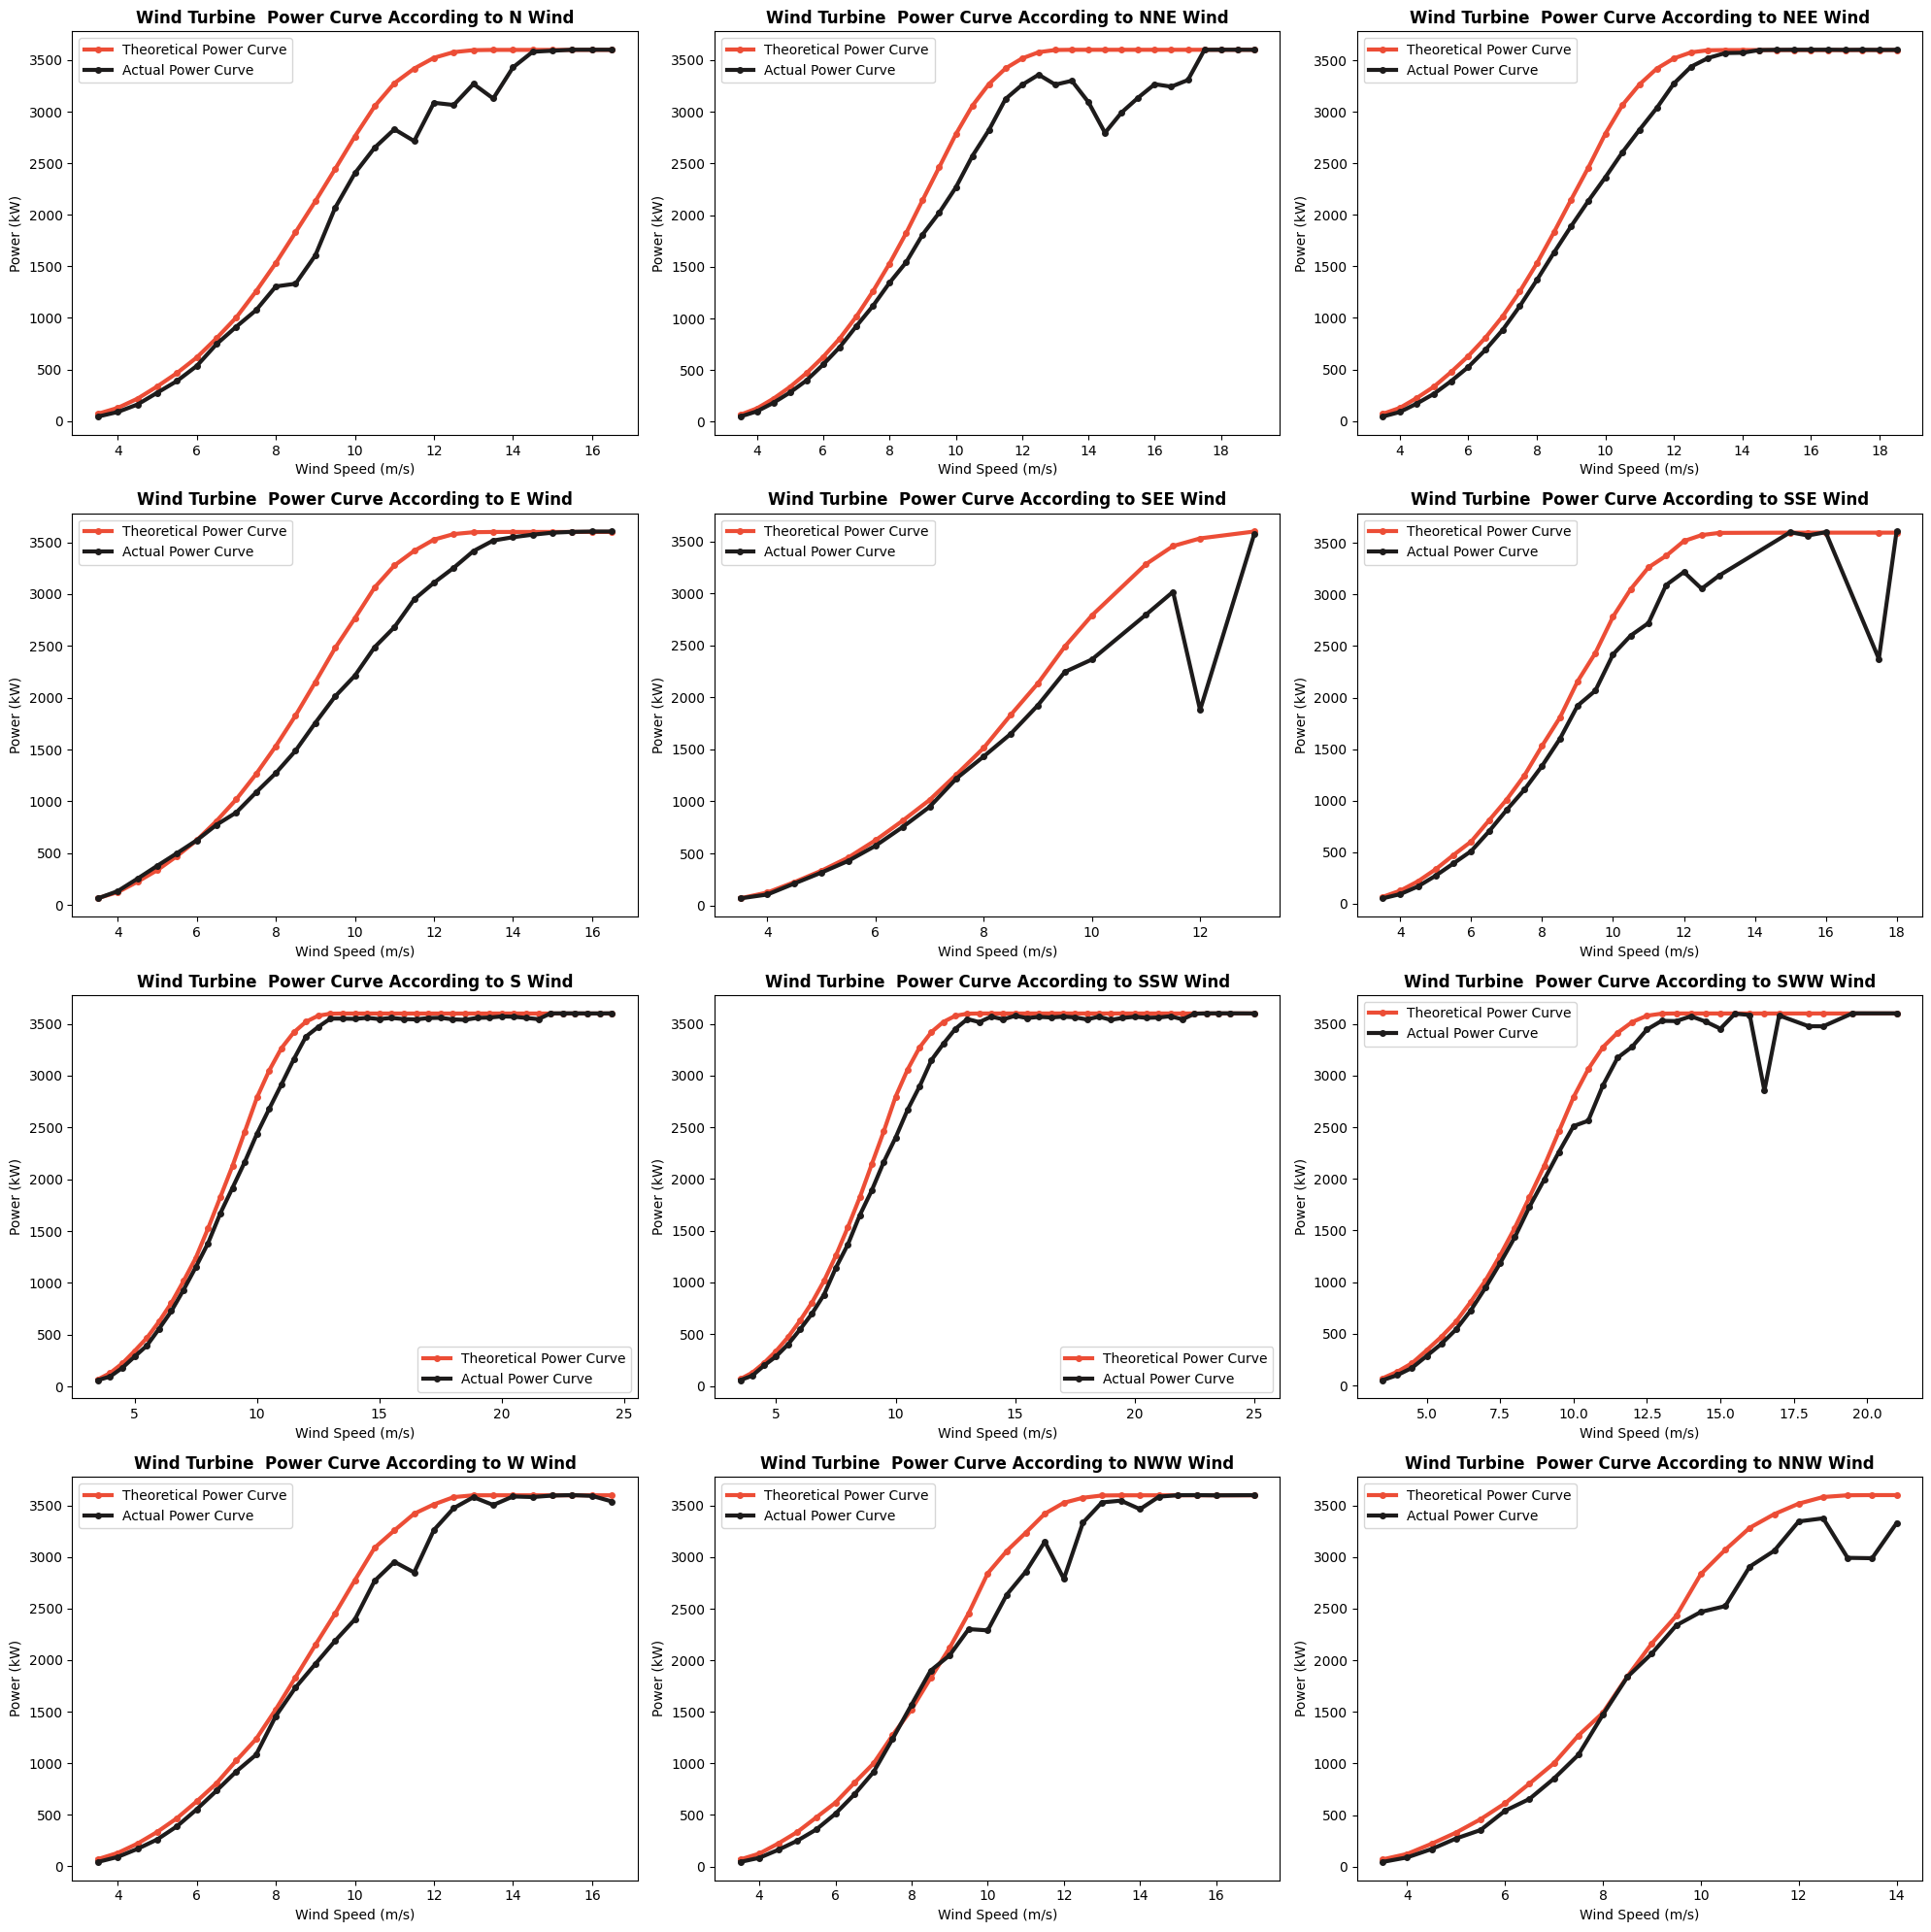

In [29]:
#theoretic and actual power vs wind speed for each direction
# Plot subplots for each direction

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
list_direction=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]
for idx, direction in enumerate(list_direction):
    row = idx // 3
    col = idx % 3
    ax = axes[row][col]
    data = data_dict[f"data_{direction}"]
    ax.plot(data["Rounded_WindSpeed"], data["Theoretical_Power_Curve (KWh)"], label="Theoretical Power Curve", marker="o", markersize=4, linewidth=3,color = "#EC4D36")
    ax.plot(data["Rounded_WindSpeed"], data["ActivePower(kW)"], label="Actual Power Curve", marker="o", markersize=4, linewidth=3,color = "#1D1B1B")
    ax.set_xlabel("Wind Speed (m/s)")
    ax.set_ylabel("Power (kW)")
    ax.set_title(f"Wind Turbine  Power Curve According to {direction} Wind",fontweight='bold' )


    ax.legend()
plt.tight_layout()
plt.show()



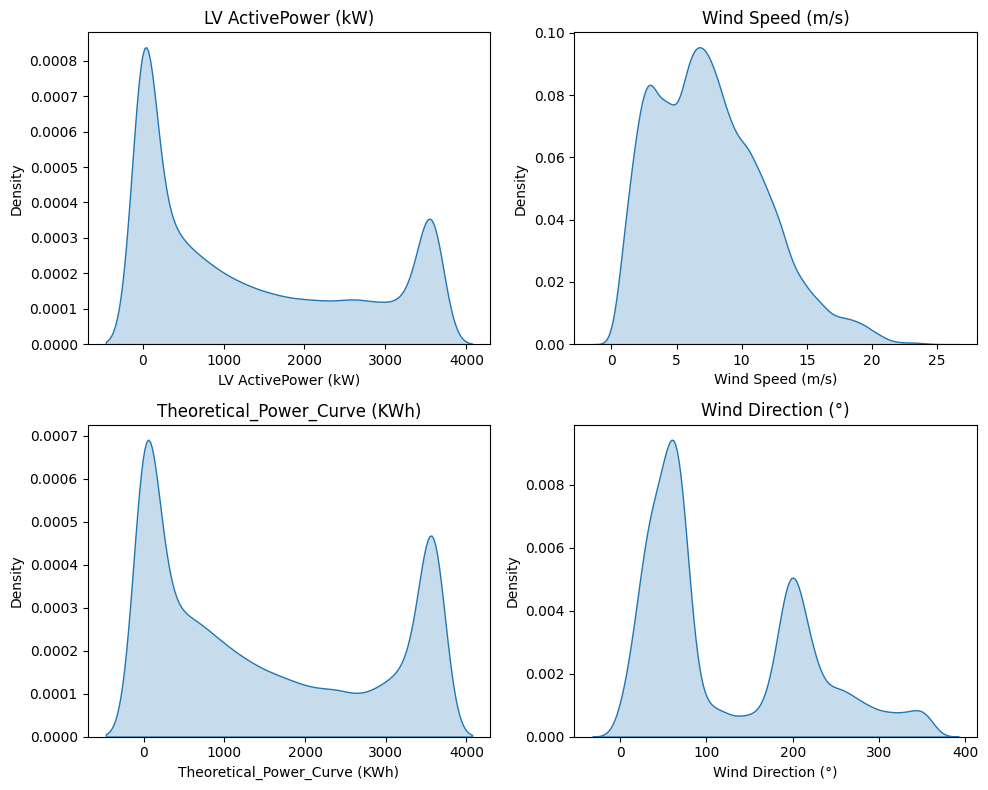

In [30]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data_wd.iloc[:,i+1], shade=True)
    plt.title(data_wd.columns[i+1])
plt.tight_layout()
plt.show()


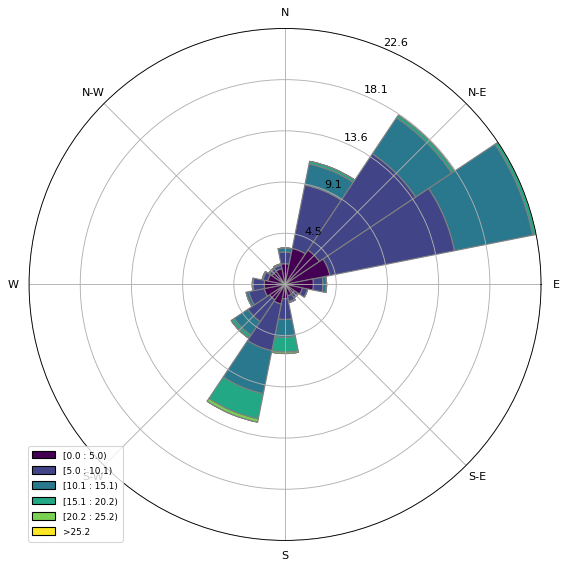

In [31]:
ax = WindroseAxes.from_ax()
ax.bar(data_wd['Wind Direction (°)'], data_wd['Wind Speed (m/s)'], normed=True, opening=1, edgecolor='grey')
ax.set_legend()
plt.show()

The data used to plot the chart is stored in the data_wd DataFrame. The wind direction (in degrees) is plotted on the x-axis and the wind speed (in m/s) is plotted on the y-axis. indrose plot using wind direction and speed data. It uses the WindroseAxes library to create a polar plot with bars representing the wind speed frequency for each wind direction sector. The resulting plot provides a visual representation of the wind climate for a given location. wind speed is high in N-E direction

### Energy Prediction

In [32]:
import datetime
import time

In [33]:
data_wd.rename(columns={'Theoretical_Power_Curve (KWh)':'Power','LV ActivePower (kW)':'ActivePower',"Wind Speed (m/s)":"WindSpeed","Wind Direction (°)":"WindDirection"},
                inplace=True)
data_wd.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [34]:
data_wd["Date/Time"] = pd.to_datetime(data_wd["Date/Time"],format = "%d %m %Y %H:%M")
data_wd["Time"] = data_wd["Time"] = data_wd["Date/Time"].dt.minute
data_wd.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,40


In [35]:
# adding time difference column
data_wd['TimeDiff'] = data_wd['Time'].diff().fillna(0)
data_wd.tail()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,10,10.0
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,20,10.0
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,30,10.0
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,40,10.0
50529,2018-12-31 23:50:00,2820.466064,9.979332,2779.184096,82.274620,50,10.0


In [36]:
#Gust speed at each time point by taking the difference of the current and previous wind speed values.
data_wd['Gust'] = data_wd['WindSpeed'].diff().fillna(0)
data_wd.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,0.0,0.000000
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,10,10.0,0.360831
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,20,10.0,-0.456130
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,30,10.0,0.443637
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,40,10.0,-0.081733


In [37]:
data_wd_1 = data_wd[data_wd['TimeDiff'].isin([10,-50])]
data_wd_1.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,10,10.0,0.360831
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,20,10.0,-0.456130
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,30,10.0,0.443637
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,40,10.0,-0.081733
5,2018-01-01 00:50:00,402.391998,5.604052,499.436385,264.578613,50,10.0,0.026111


In [38]:
len(data_wd_1)

50500

In [39]:
data_wd_1=data_wd_1[data_wd_1['ActivePower']>=0]
data_wd_1.describe()

,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
count,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000
mean,1309.932554,7.565593,1494.454238,123.716485,24.997125,-0.002181,0.001787
std,1312.471586,4.226063,1367.906548,93.425141,17.078962,22.362852,0.742791
min,0.000000,0.000000,0.000000,0.000000,0.000000,-50.000000,-14.075440
25%,53.512621,4.212597,163.517562,49.344398,10.000000,10.000000,-0.380538
50%,828.896973,7.114135,1068.206544,73.689552,20.000000,10.000000,0.001451
75%,2485.947510,10.307985,2969.201056,201.697906,40.000000,10.000000,0.379923
max,3618.732910,25.206011,3600.000000,359.997589,50.000000,10.000000,17.411289


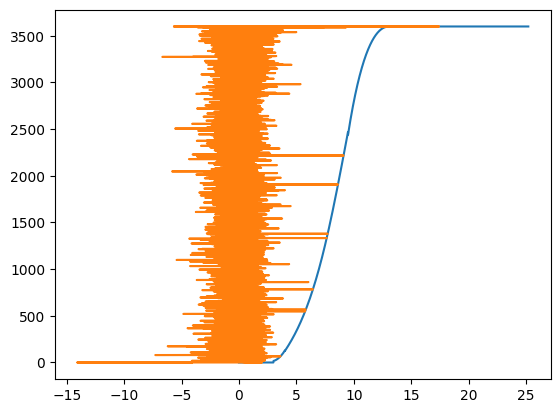

In [40]:
x=data_wd_1.sort_values(by='WindSpeed')['WindSpeed']
y=data_wd_1.sort_values(by='WindSpeed')['Power']
z=data_wd_1.sort_values(by='WindSpeed')['Gust']

plt.plot(x,y)
plt.plot(z,y)

## Training

In [85]:
!pip install lightgbm
!pip install catboost

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, HistGradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor


In [87]:

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data_wd_1[['WindSpeed','WindDirection','Gust','Power']],
                                                    data_wd_1['ActivePower'],
                                                    test_size=0.2,
                                                    random_state=42)


In [88]:
#Evaluating a machine learning model's performance using cross-validation. The root mean squared error (RMSE) is calculated using KFold cross-validation with 5 folds.
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=15).get_n_splits(data_wd_1.values)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [89]:
#It applies Lasso regression on the data and calculates the root mean square logarithmic error (RMSLE) score using cross-validation. The score is printed at the end.
lasso = Lasso(alpha = 0.5)
lasso_pipe = make_pipeline(RobustScaler(), lasso)
score = rmsle_cv(lasso_pipe)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score


Lasso score: 401.4630 (12.5660)



array([386.2704739 , 418.69587591, 410.15451925, 388.07810631,
       404.11627341])

In [90]:
#trains a HistGradientBoostingRegressor model using the data and calculates its root mean squared logarithmic error (rmsle) using cross-validation with 5 folds.
#The resulting score and standard deviation are then printed to the console.
HistGB=HistGradientBoostingRegressor(learning_rate=0.18,max_iter=100,max_leaf_nodes=4)

score = rmsle_cv(HistGB)
print("Hist Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score

Hist Gradient Boosting score: 380.9483 (11.2478)



array([369.84647321, 398.25139683, 387.55904053, 368.05588009,
       381.02875348])

In [91]:
#K-Nearest Neighbors (KNN) Regression model with specific hyperparameters to predict wind turbine power output. 
#calculates the Root Mean Squared Log Error (RMSLE) score for the KNN model using cross-validation. 
#The RMSLE score represents the difference between the predicted and actual power output values, with a lower score indicating better performance. 
#The final printed output shows the mean and standard deviation of the RMSLE score for the KNN model.


KNR=KNeighborsRegressor(n_neighbors=8, weights='uniform', algorithm='auto', leaf_size=100, p=1, metric='minkowski')
KNR.fit(x_train, y_train)
score = rmsle_cv(KNR)
print("KNR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score

KNR score: 396.0921 (7.9181)



array([389.62566087, 407.56106078, 402.72889069, 386.50782878,
       394.03714889])

In [92]:
#creates an instance of the XGBoost regression model with specific hyperparameters, including learning rate, maximum depth, number of estimators, and regularization parameters.
model_xgb1 = xgb.XGBRegressor(learning_rate=2e-2, max_depth=4, 
                             min_child_weight=1.1, n_estimators=100,
                             reg_alpha=0.3, reg_lambda=0.7,
                             #subsample=0.5213, silent=1,
                             nthread = -1)

In [93]:
model_xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.02, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1.1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1, nthread=-1,
             num_parallel_tree=1, predictor='auto', ...)

In [94]:
# Fitting an XGBoost regression model on training data and obtaining the root mean squared error score on the training set.
preds=model_xgb1.predict(x_train)
score=mean_squared_error(y_train,preds)
score**0.5

448.94204550525467

In [95]:
r2_score(y_train,preds)

0.8829379336482327

In [51]:
x_train

,WindSpeed,WindDirection,Gust,Power
1349,1.705419,204.119003,0.677526,0.000000
470,8.964849,221.351501,1.069050,2121.355873
47626,1.615257,75.672569,0.037096,0.000000
10571,13.352920,218.704300,0.210110,3600.000000
44163,7.100430,73.073639,-0.510699,1061.846817
...,...,...,...,...
11316,6.109824,181.986404,0.648038,661.666709
44808,1.338087,268.249512,-0.375544,0.000000
38230,6.838711,238.486298,0.614715,945.004858
865,12.858350,205.007401,0.143320,3596.308785


In [96]:
model_xgb1.predict(np.array([6.02,110.0,0.23,1000]).reshape(1,-1))

array([452.23813], dtype=float32)

In [97]:
#  LGBMRegressor model with specified hyperparameters including objective, number of leaves, learning rate, number of estimators, and regularization terms.
model_lgb1 = lgb.LGBMRegressor(objective='regression',
                               num_leaves=2,
                               learning_rate=0.07,
                               n_estimators=80,
                               reg_alpha=0.3,
                               reg_lambda=0.7)


In [99]:
model_lgb1.fit(x_train,y_train)

LGBMRegressor(learning_rate=0.07, n_estimators=80, num_leaves=2,
              objective='regression', reg_alpha=0.3, reg_lambda=0.7)

In [100]:
#creates an instance of the LGBMRegressor model and trains it on the given data. It then uses the trained model to make predictions on the same data and calculates the root mean squared error between the predicted values and actual target values.

preds=model_lgb1.predict(x_train)
score=mean_squared_error(y_train,preds)
score**0.5

390.5920086163166

In [101]:
r2_score(y_train,preds)

0.9113900827564267

In [102]:
model_lgb1.predict(np.array([6.02,110.0,0.23,1000]).reshape(1,-1))

array([758.23753688])

## Testing

##### XGBoost Model

In [72]:
preds1=model_xgb1.predict(x_test)
score_XGB=mean_squared_error(y_test,preds1)**0.5
print("XGB RMSE score: {:.4f}\n".format(score_XGB))

XGB RMSE score: 454.1873



In [73]:
r2_score(y_test,preds1)

0.8804640295797294

In [120]:
print(f"The root mean squared error (RMSE) for XGBoost on the test set is {score_XGB}. The R-squared score for the predictions is {r2_score(y_test,preds1)}.")

The root mean squared error (RMSE) for XGBoost on the test set is 454.18730010872633. The R-squared score for the predictions is 0.8804640295797294.


##### LightGBM model

In [74]:
preds2=model_lgb1.predict(x_test)
score_LGBM=mean_squared_error(y_test,preds2)**0.5
print("LGBM RMSE score: {:.4f}\n".format(score_LGBM))

LGBM RMSE score: 396.8851



In [75]:
r2_score(y_test,preds2)

0.9087236391906729

In [121]:
print(f"The root mean squared error (RMSE) for XGBoost on the test set is {score_LGBM}, The R-squared score for the predictions is {r2_score(y_test,preds2)}")

The root mean squared error (RMSE) for XGBoost on the test set is 396.88514024428684, The R-squared score for the predictions is 0.9087236391906729


##### KNeighborsRegressor model

In [116]:
preds3 = KNR.predict(x_test)
score_KNR = mean_squared_error(y_test, preds3)**0.5
print("KNR RMSE score: {:.4f}\n".format(score_KNR))

KNR RMSE score: 396.9087



In [118]:
r2_score(y_test,preds3)

0.9087128142310934

In [123]:
print(f"The root mean squared error (RMSE) for KNeighborsRegressor on the test set is {score_KNR}. The R-squared score for the predictions is {r2_score(y_test,preds3)}")

The root mean squared error (RMSE) for KNeighborsRegressor on the test set is 396.90867392919137. The R-squared score for the predictions is 0.9087128142310934


##### HistGB model

In [104]:
histgb = HistGradientBoostingRegressor()
preds4 = histgb.fit(x_train, y_train).predict(x_test)
score_histgb = mean_squared_error(y_test, preds4)**0.5
print("HistGB RMSE score: {:.4f}\n".format(score_histgb))


HistGB RMSE score: 377.5154



In [119]:
r2_score(y_test,preds4)

0.9174156092404548

In [124]:
print(f"The root mean squared error (RMSE) for HistGB on the test set is {histgb}The R-squared score for the predictions is {r2_score(y_test,preds4)}")

The root mean squared error (RMSE) for HistGB on the test set is HistGradientBoostingRegressor()The R-squared score for the predictions is 0.9174156092404548


##### Lasso Regression 

In [106]:
preds5 = lasso.fit(x_train, y_train).predict(x_test)
score_lasso = mean_squared_error(y_test, preds4)**0.5
print("Lasso RMSE score: {:.4f}\n".format(score_lasso))

Lasso RMSE score: 377.5154



In [107]:
r2_score(y_test,preds4)

0.9174156092404548

In [125]:
print(f"The root mean squared error (RMSE) for Lasso Regression on the test set is {score_lasso} The R-squared score for the predictions is {r2_score(y_test,preds4)}")

The root mean squared error (RMSE) for Lasso Regression on the test set is 377.51539366824846 The R-squared score for the predictions is 0.9174156092404548


### Comparing Real, Theoritical and Predicted Power Productions

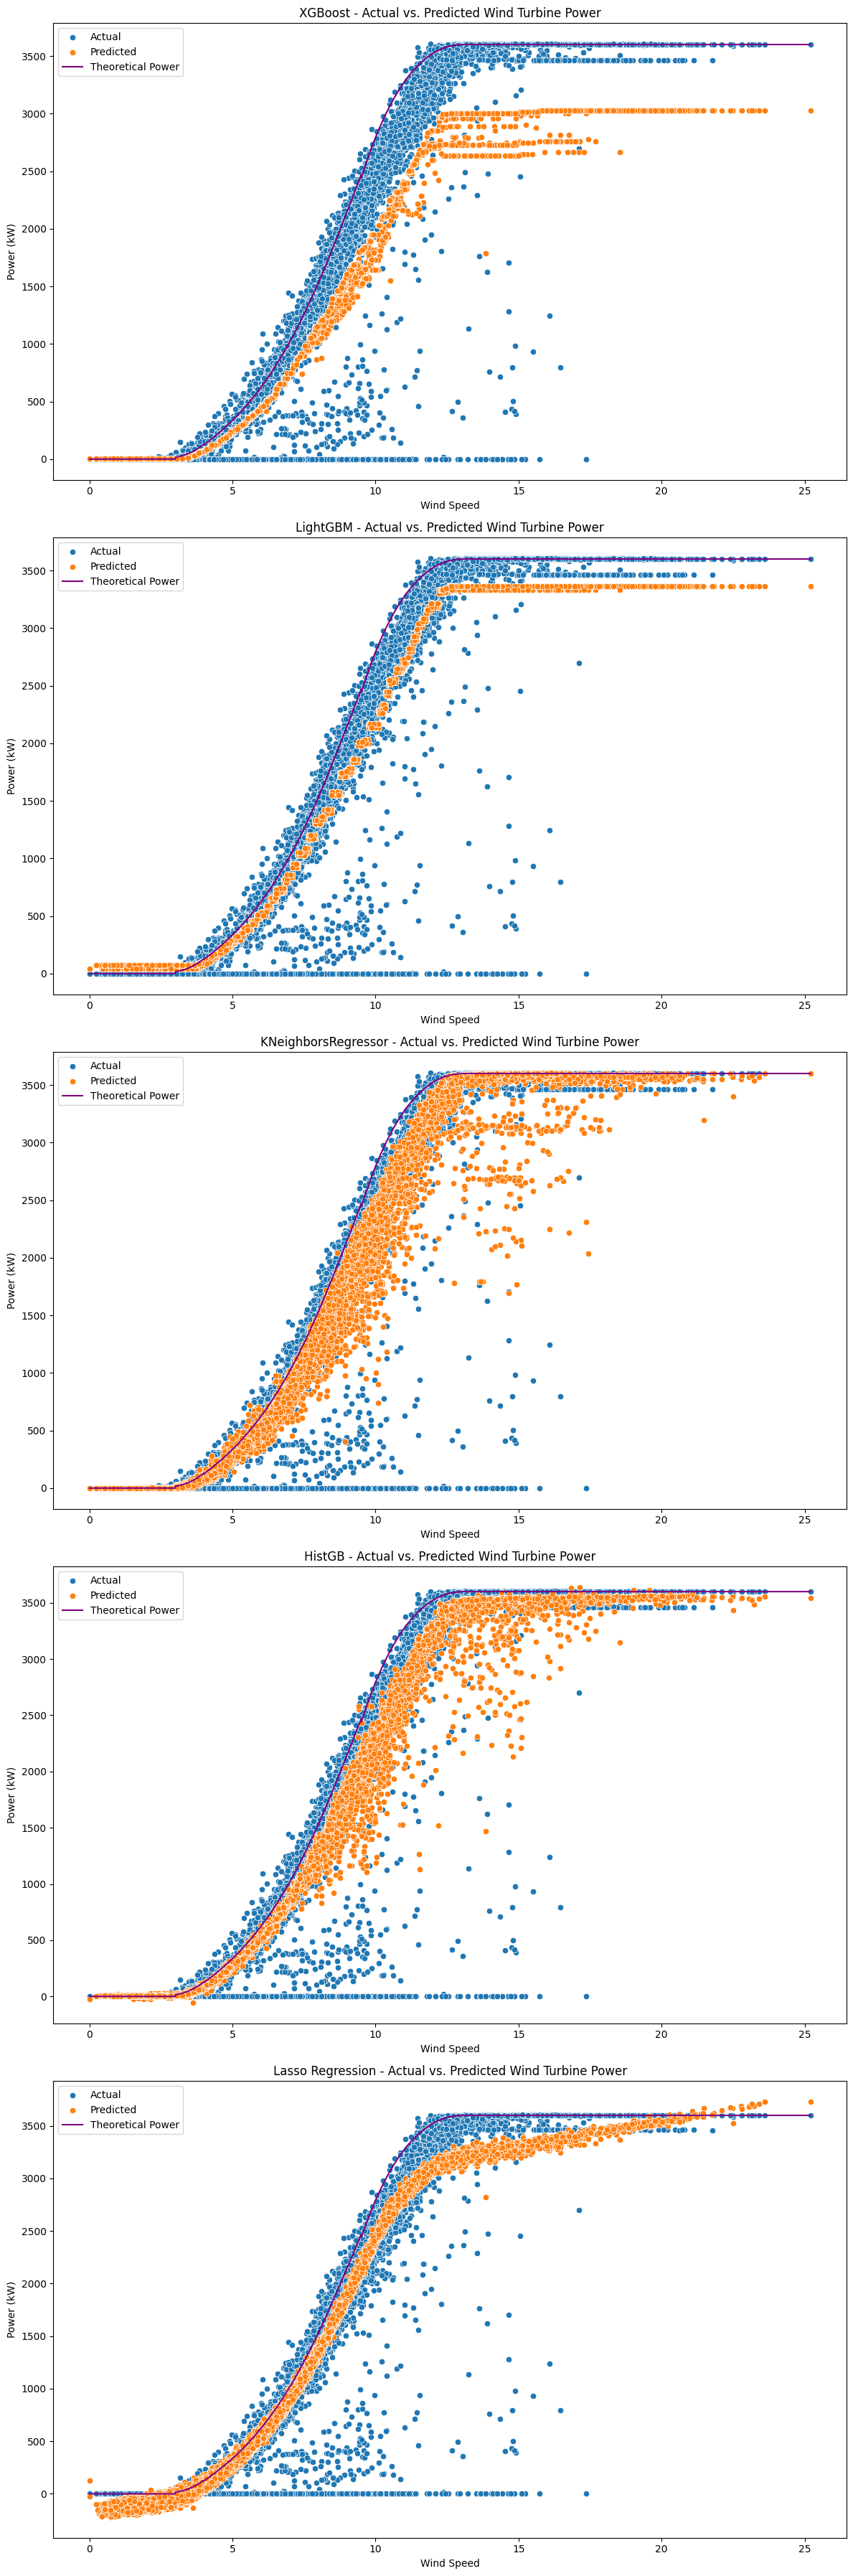

In [110]:
# Create the subplot figure
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 36))

# Define model names and predictions
models = [model_xgb1, model_lgb1, KNR, histgb, lasso]
model_names = ["XGBoost","LightGBM","KNeighborsRegressor","HistGB","Lasso Regression"]
preds = [m.predict(x_test) for m in models]

# Loop through each model and plot its results
for i, ax in enumerate(axs):
    data = pd.DataFrame({'WindSpeed': x_test['WindSpeed'], 'Actual': y_test, 'Predicted': preds[i]})
    sns.scatterplot(data=data, x='WindSpeed', y='Actual', label='Actual', ax=ax)
    sns.scatterplot(data=data, x='WindSpeed', y='Predicted', label='Predicted', ax=ax)
    sns.lineplot(x='WindSpeed', y='Power', label='Theoretical Power',color='purple', data=x_test, ax=ax)
    ax.set_xlabel('Wind Speed')
    ax.set_ylabel('Power (kW)')
    ax.set_title(model_names[i] + ' - Actual vs. Predicted Wind Turbine Power')

# Display the plot
plt.tight_layout()
plt.show()


Based on the evaluation metrics provided, it seems that the HistGB model performed the best with the lowest RMSE score and the highest R-squared. The KNeighborsRegressor and LightGBM models also performed well with low RMSE scores and high R-squared scores. The XGBoost model had a higher RMSE score than the others, but still had a decent R-squared score . The Lasso Regression model had the highest RMSE score and lowest R-squared score, indicating that it may not be the best choice for predicting wind turbine power.

In conclusion, it seems that the HistGB model would be the best choice for predicting wind turbine power based on the evaluation metrics. However, it is important to keep in mind that different models may perform differently depending on the specific dataset and other factors. Therefore, it is always a good idea to try out different models and compare their performance before making a final decision.

